In [6]:
import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ad = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Data Inspection

In [ ]:
ad.shape


(200, 4)

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data cleaning

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


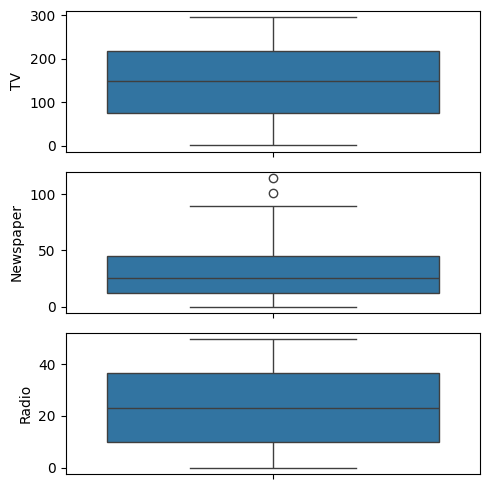

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad['TV'], ax = axs[0])
plt2 = sns.boxplot(ad['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(ad['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.


Exploratory Data Analysis


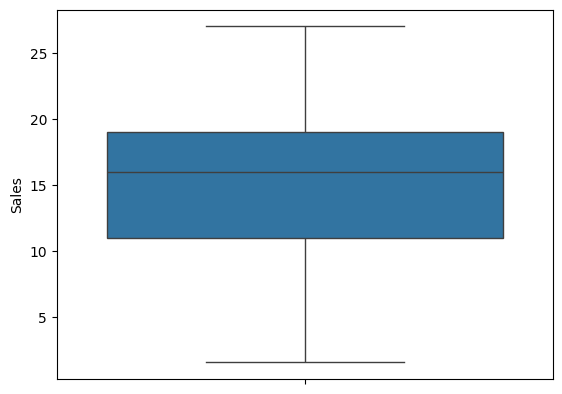

In [ ]:
sns.boxplot(ad['Sales'])
plt.show()

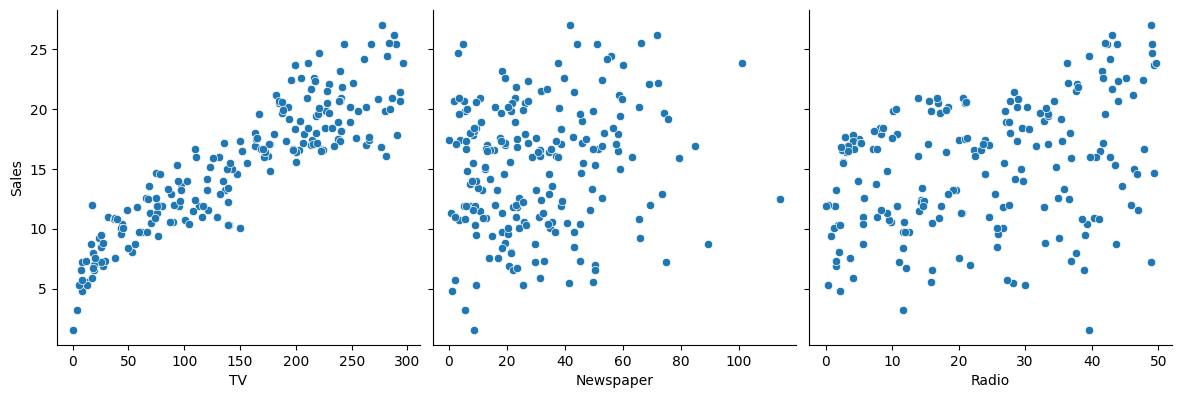

In [ ]:
#Sales related with other variables using scatter plot.
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

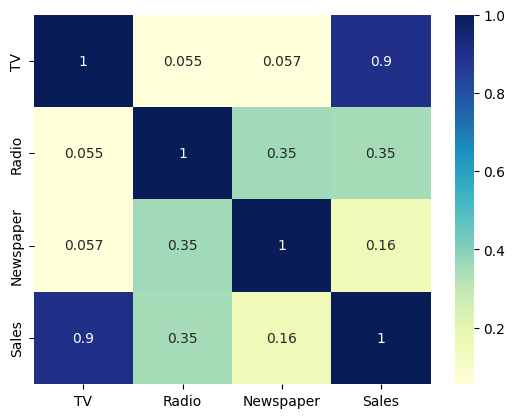

In [ ]:
 #correlation between different variables.
sns.heatmap(ad.corr(), cmap="YlGnBu", annot = True)
plt.show()

model buliding


We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.


In [9]:
X = ad['TV']
y = ad['Sales']

In [16]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [17]:

y_train.head()

,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


Predictions on the Test Set

In [20]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

from statsmodels.regression.linear_model import OLS
lr = OLS(y_train, X_train).fit()

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [22]:
y_pred.head()

,0
126,7.374140
104,19.941482
99,14.323269
92,18.823294
111,20.132392


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

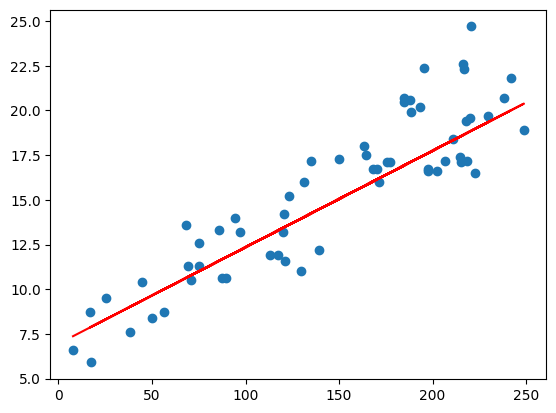

In [31]:
# Assuming X represents the 'TV' advertising expenditure
X = ad['TV']
y = ad['Sales']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Add a constant to the training data for the intercept term
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
from statsmodels.regression.linear_model import OLS
lr = OLS(y_train, X_train_sm).fit() # Fit using X_train_sm which has the constant

# Predict on the test set
# Add a constant to X_test as well before prediction
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)


# Now, X_test and y_test should have the same length for plotting
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')  # This line also uses X_test
plt.show()